# Compare different P1D measurements

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 160
mpl.rcParams['figure.dpi'] = 160
from cup1d.data import data_PD2013
from cup1d.data import data_Irsic2017
from cup1d.data import data_Walther2018
from cup1d.data import data_Chabanier2019
from cup1d.data import data_Karacayli2022, data_Karacayli2023
from cup1d.data import data_Ravoux2023
from cup1d.data import data_QMLE_Ohio

### Read all P1D measurements

In [2]:
keys = ['label','marker', 'color', 'data'] 
datasets = [dict(zip(keys,['Irsic17','o', 'C0',data_Irsic2017.P1D_Irsic2017()])),
            dict(zip(keys,['Walther18','x', 'C1',data_Walther2018.P1D_Walther2018()])),
            dict(zip(keys,['Chabanier19','*', 'C2',data_Chabanier2019.P1D_Chabanier2019()])),
            dict(zip(keys,['Karacayli22','^', 'C3',data_Karacayli2022.P1D_Karacayli2022()])),
            dict(zip(keys,['Karacayli23','v', 'C4',data_Karacayli2023.P1D_Karacayli2023()])),
            dict(zip(keys,['Ravoux23','s', 'C5',data_Ravoux2023.P1D_Ravoux2023()]))]
            #,dict(zip(keys,['Ohio_QMLE_Y5','v',data_QMLE_Ohio.P1D_QMLE_Ohio()]))]

Nz = 14 , Nk = 13
Nz = 10 , Nk = 30


In [3]:
def combined_plot(datasets,zmin=1.7,zmax=6.0,kmin=0.001,kmax=0.1):
    Ndata=len(datasets)
    for idata in range(Ndata):
        label=datasets[idata]['label']
        marker=datasets[idata]['marker']
        color=datasets[idata]['color']
        data=datasets[idata]['data']
        k_kms=data.k_kms
        kplot=(k_kms>kmin) & (k_kms<kmax)
        k_kms=k_kms[kplot]
        zs=data.z
        Nz=len(zs)
        for iz in range(Nz):
            z=zs[iz]
            if z < zmin: continue
            if z > zmax: continue
            Pk_kms=data.get_Pk_iz(iz)[kplot]
            err_Pk_kms=np.sqrt(np.diagonal(data.get_cov_iz(iz)))[kplot]
            fact=k_kms/np.pi
            # to be fixed
            _ = np.isfinite(err_Pk_kms) & (err_Pk_kms < 1e6)
            plt.errorbar(k_kms[_],(fact*Pk_kms)[_],
                         marker=marker,ms=4.5,ls="none",
                         c=color,
                         yerr=(fact*err_Pk_kms)[_],
                         label=label+' z = {}'.format(z), alpha=0.7)
    plt.legend()
    plt.yscale('log', nonpositive='clip')
    plt.xscale('log')
    plt.ylabel(r'$k P(k)/ \pi$')

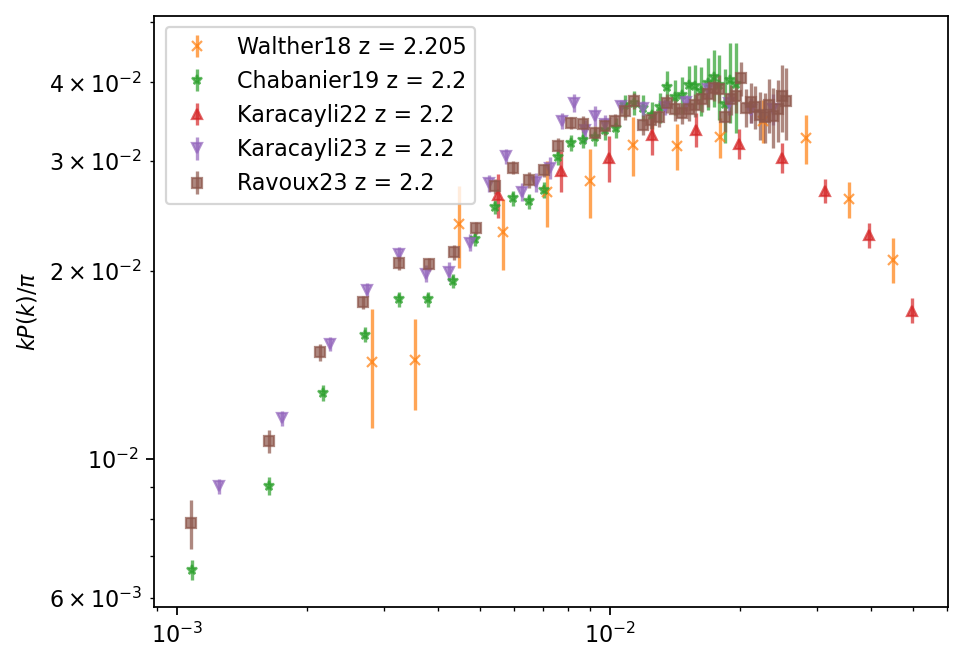

In [4]:
combined_plot(datasets,zmin=2.05,zmax=2.25,kmax=0.05)

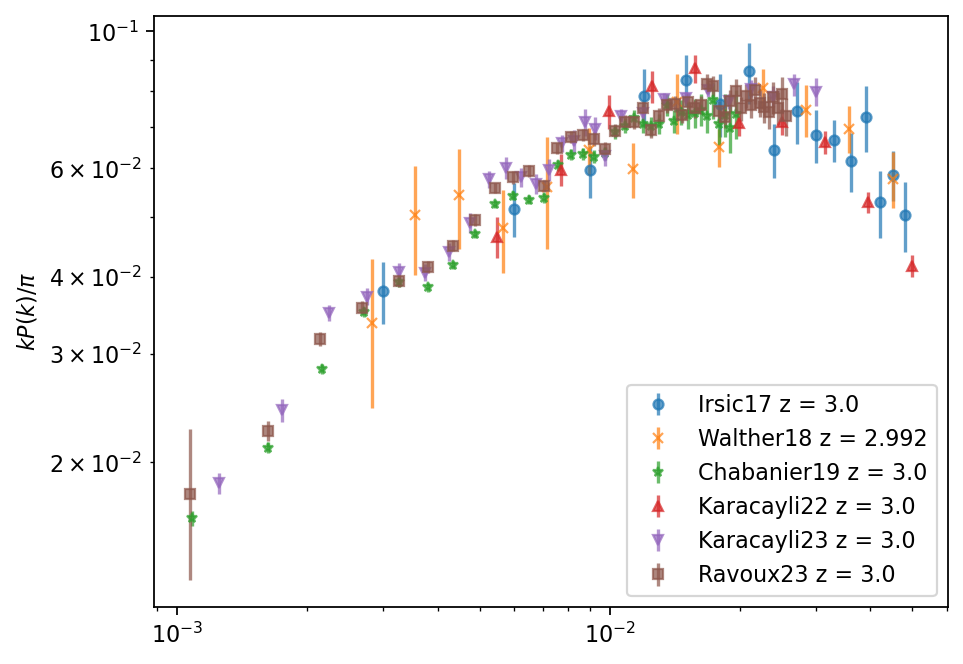

In [5]:
combined_plot(datasets,zmin=2.9,zmax=3.1,kmax=0.05)

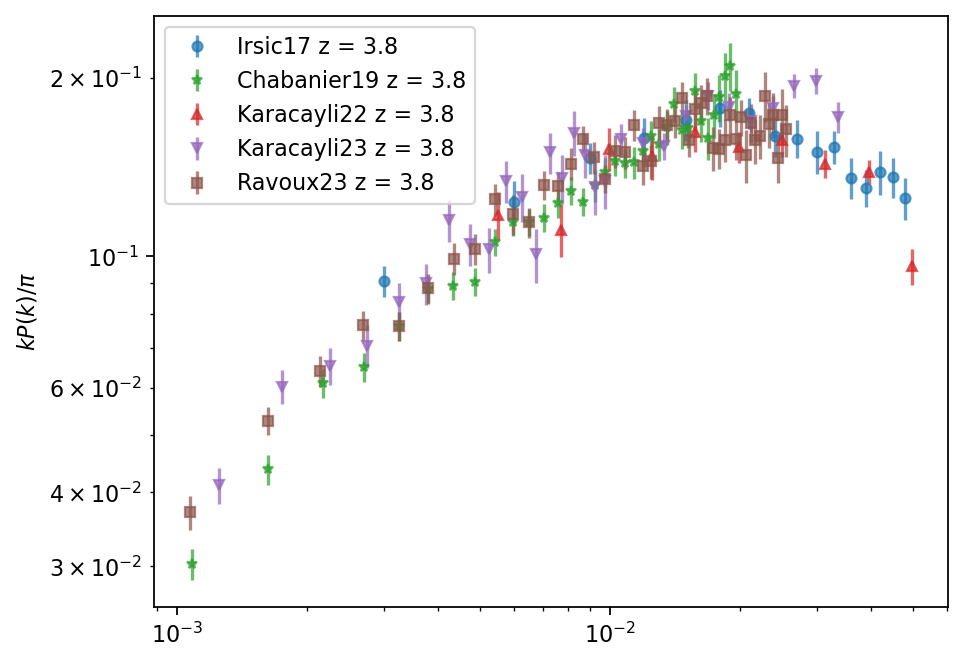

In [6]:
combined_plot(datasets,zmin=3.7,zmax=3.9,kmax=0.05)

### Reproduce Figure 7 of Irsic et al. (2017)

Fig 7 of Irsic et al. (2017) compares PD2013 with Irsic2017, at three different redshifts. We plot them here.

In [7]:
keys = ['label','marker', 'color', 'data'] 
datasets = [dict(zip(keys,['I17','o', 'C0',data_Irsic2017.P1D_Irsic2017()])),
            dict(zip(keys,['PD13','*','C1',data_PD2013.P1D_PD2013()]))]

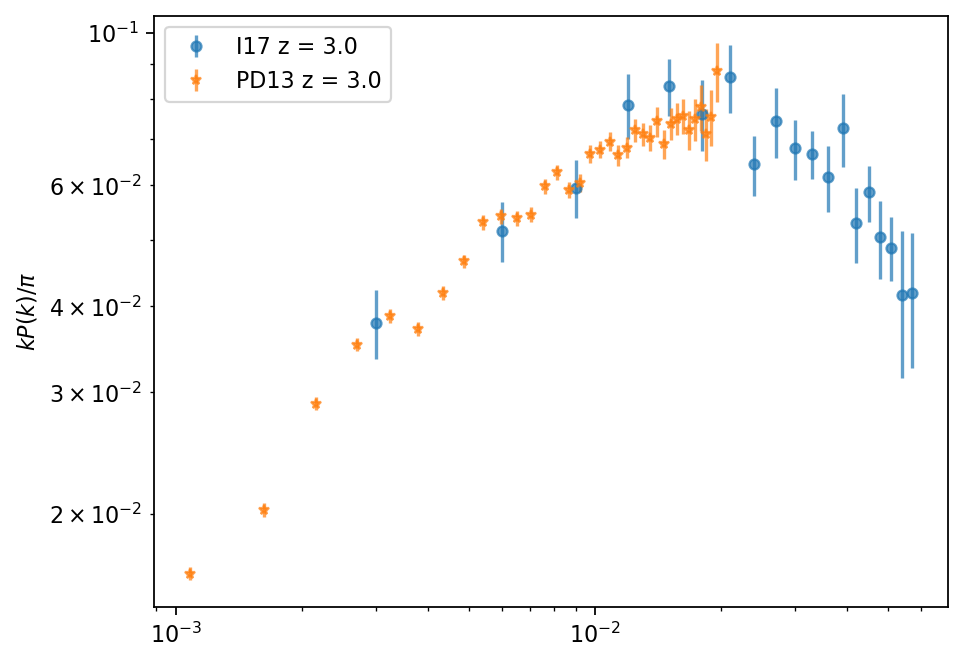

In [8]:
combined_plot(datasets,zmin=2.99,zmax=3.01,kmax=0.065)

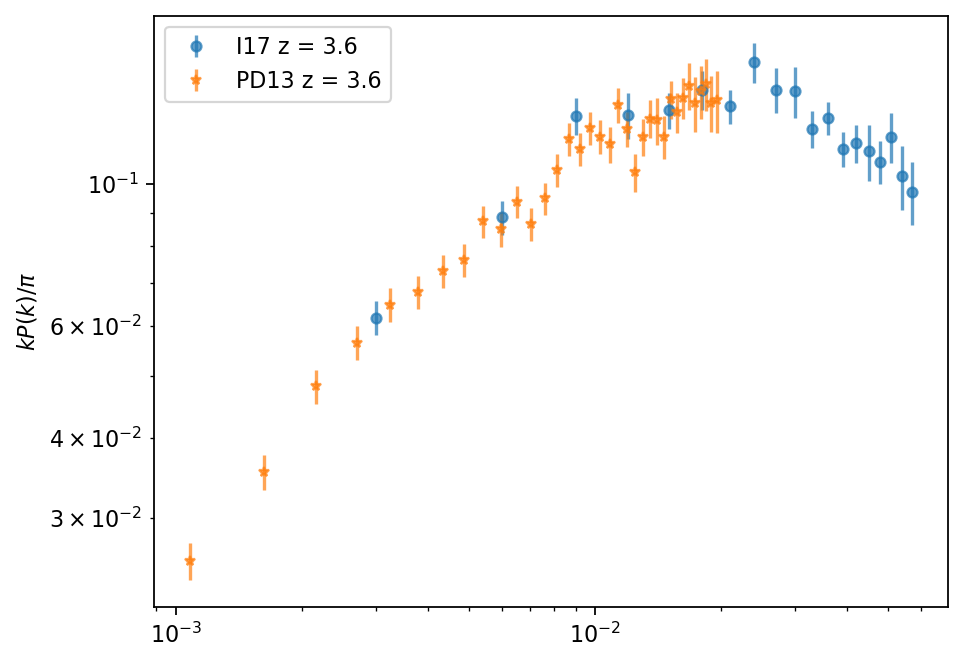

In [9]:
combined_plot(datasets,zmin=3.59,zmax=3.61,kmax=0.065)

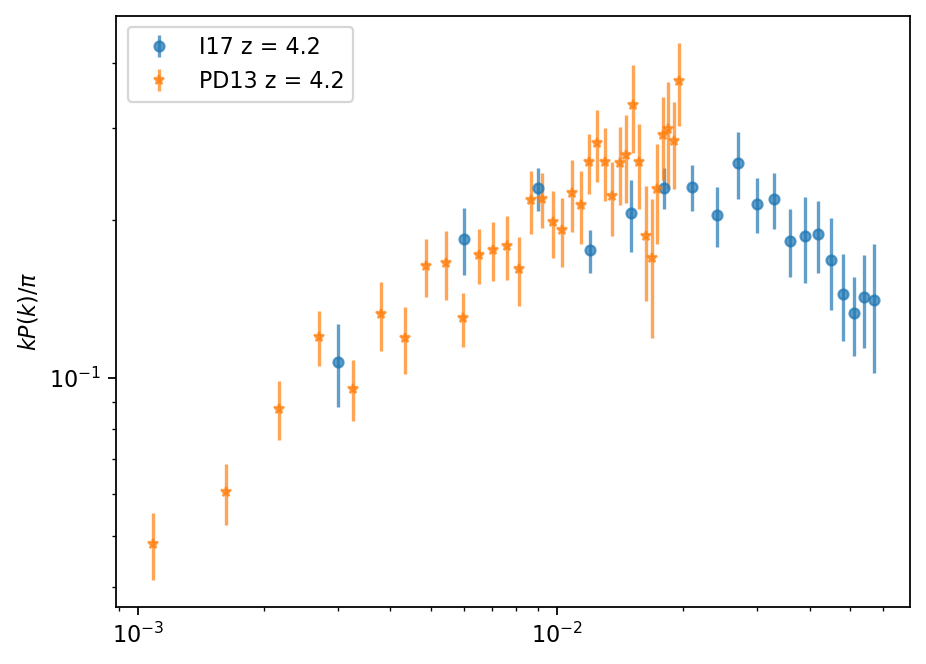

In [10]:
combined_plot(datasets,zmin=4.19,zmax=4.21,kmax=0.065)

### Reproduce Figure 8 of Walther et al. (2018)

Fig 8 of Walther et al. (2018) compares PD2013 with Walther2018, at several redshifts. We plot them here.

In [11]:
keys = ['label','marker', 'color','data'] 
datasets = [dict(zip(keys,['W18','o','C0',data_Walther2018.P1D_Walther2018()])),
            dict(zip(keys,['PD13','*','C1',data_PD2013.P1D_PD2013()]))]

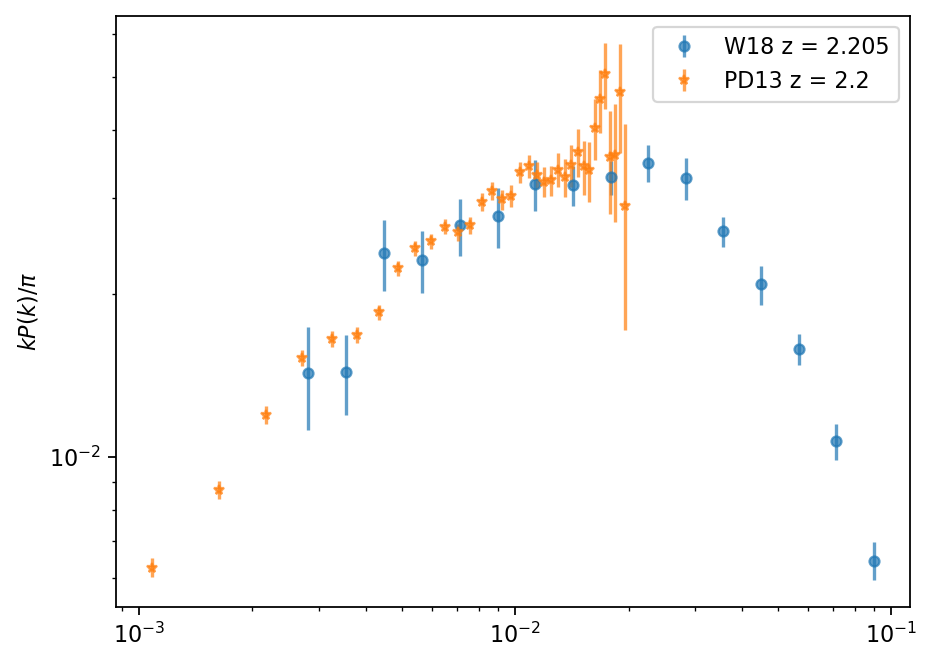

In [12]:
combined_plot(datasets,zmin=2.19,zmax=2.21,kmax=0.11)

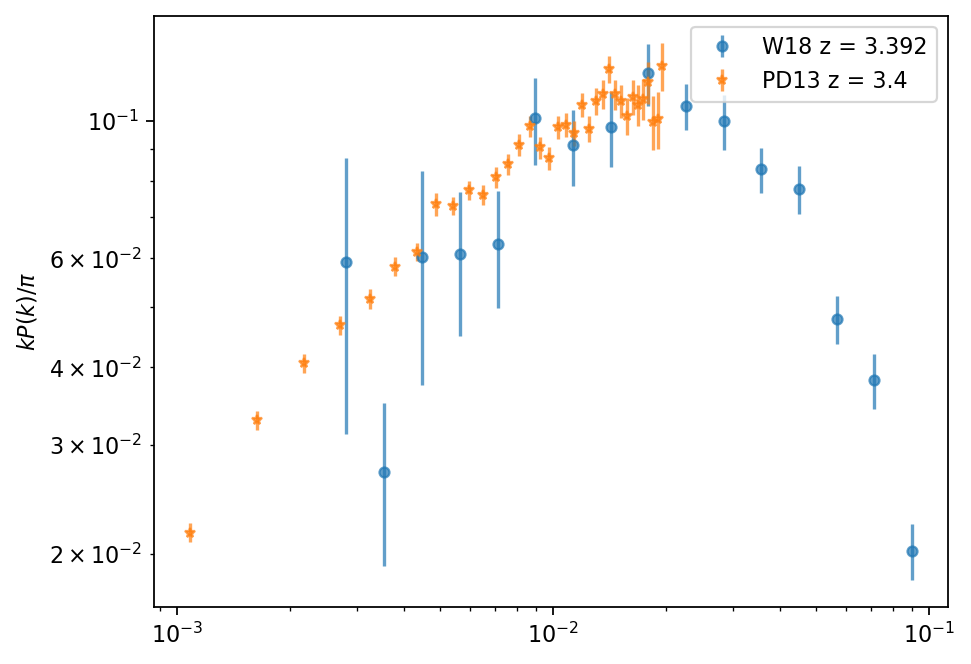

In [13]:
combined_plot(datasets,zmin=3.39,zmax=3.41,kmax=0.11)

### Reproduce Figure 8 of Karaçayli et al. (2022)

Figure 8 of Karaçayli et al. (2022) compares the results of this paper with Chabanier2019, and Karacayli22 at several redshifts. We plot them here.

In [14]:
keys = ['label','marker', 'color', 'data'] 
datasets = [dict(zip(keys,['Chabanier19','*', 'C0',data_Chabanier2019.P1D_Chabanier2019()])),
            dict(zip(keys,['Karacayli22','^', 'C1',data_Karacayli2022.P1D_Karacayli2022()])),
            dict(zip(keys,['Karacayli23','v', 'C2',data_Karacayli2023.P1D_Karacayli2023()]))]

Nz = 14 , Nk = 13
Nz = 10 , Nk = 30


In [15]:
data_Karacayli2023.P1D_Karacayli2023().z

Nz = 10 , Nk = 30


array([2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8])

Nz = 14 , Nk = 13


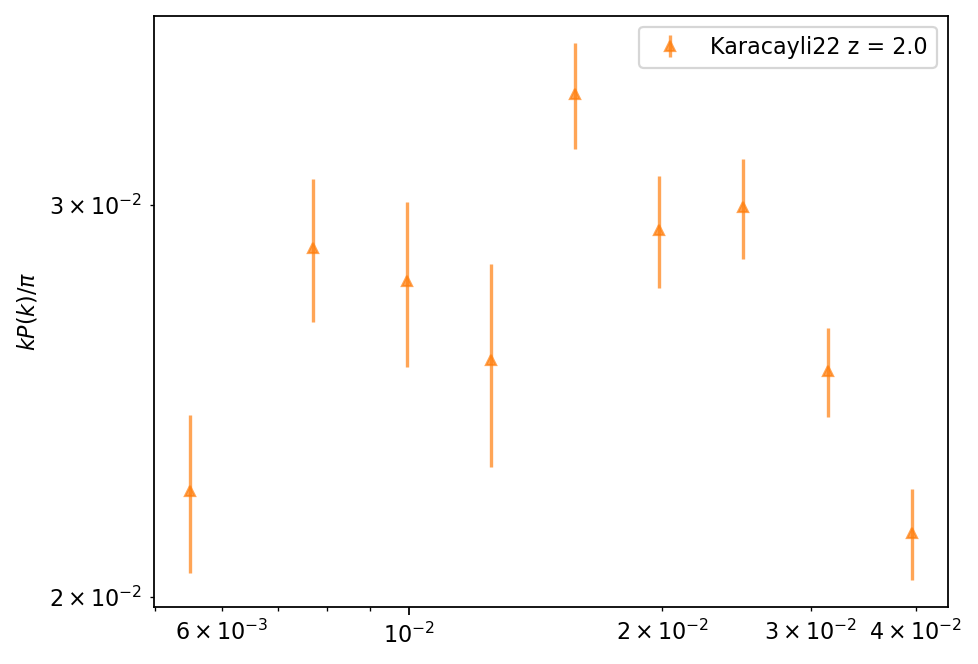

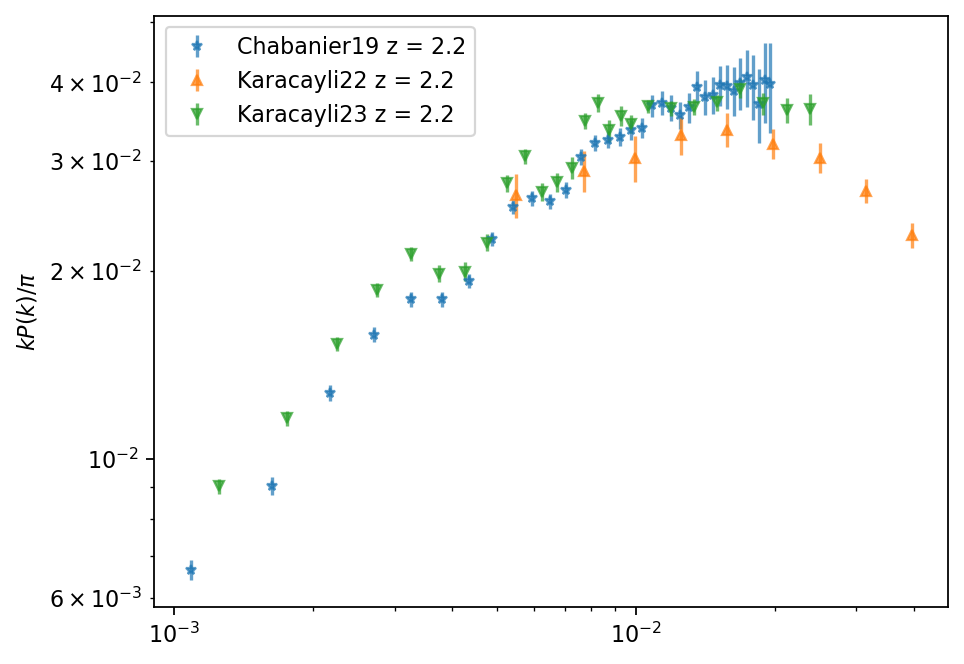

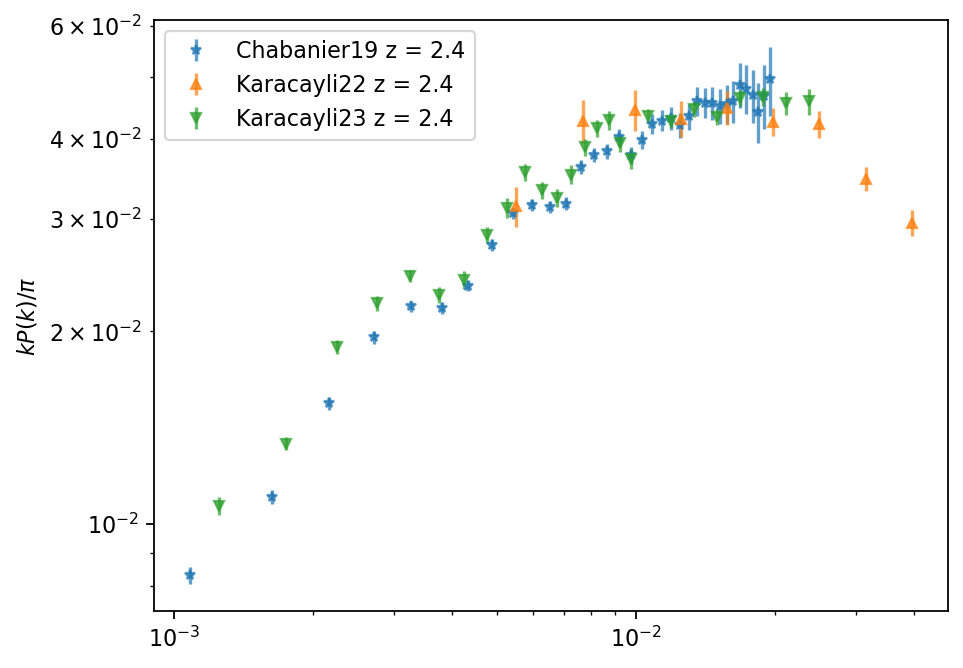

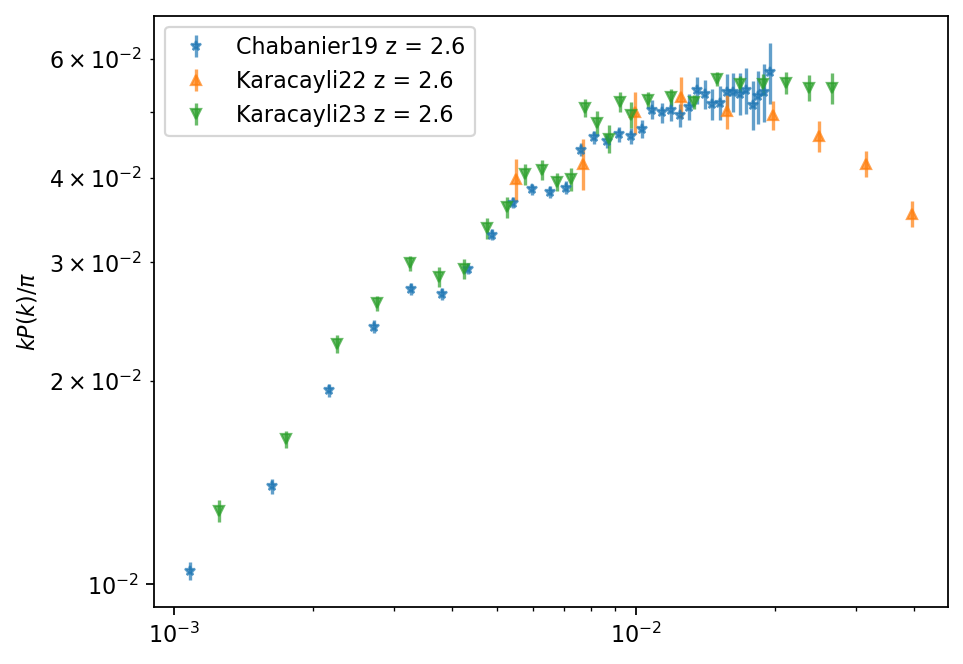

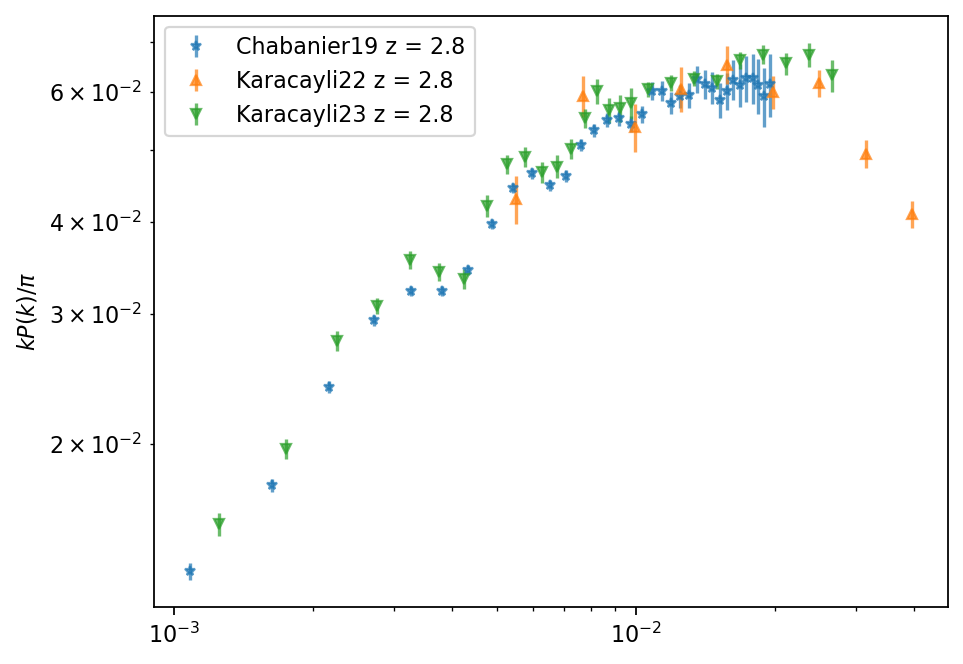

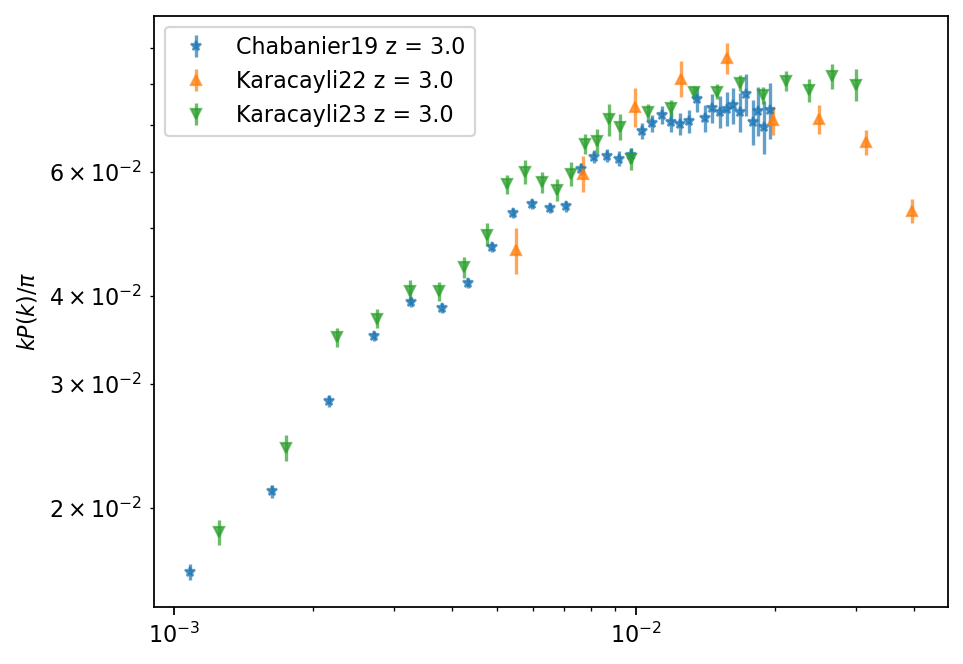

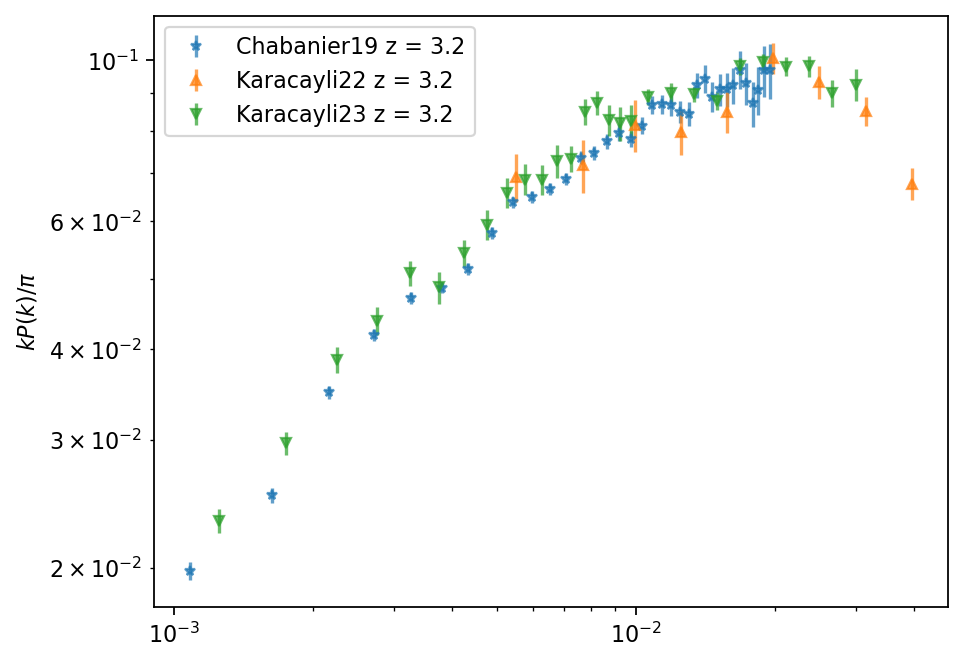

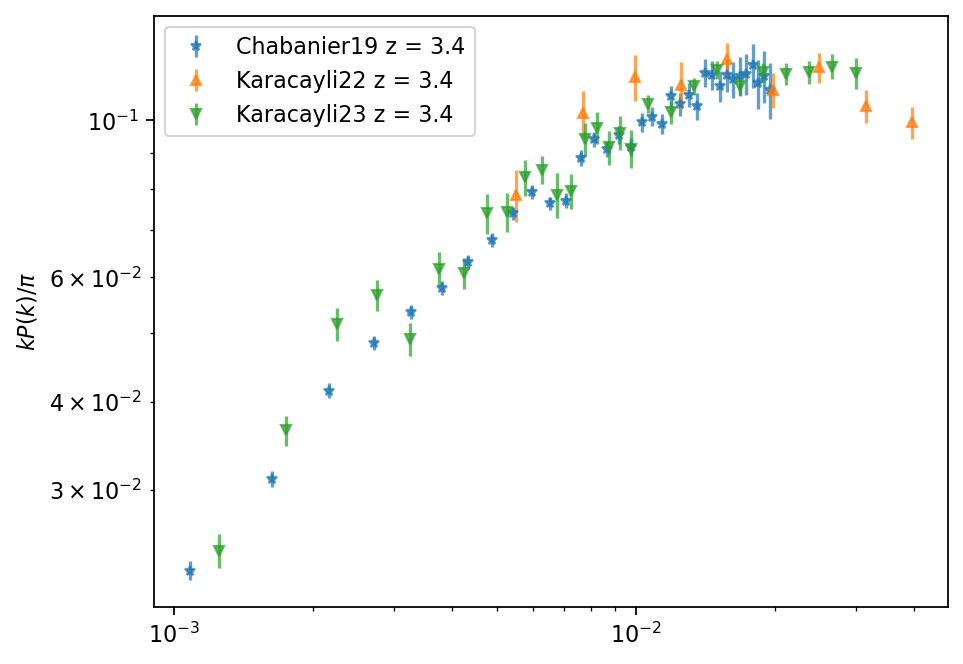

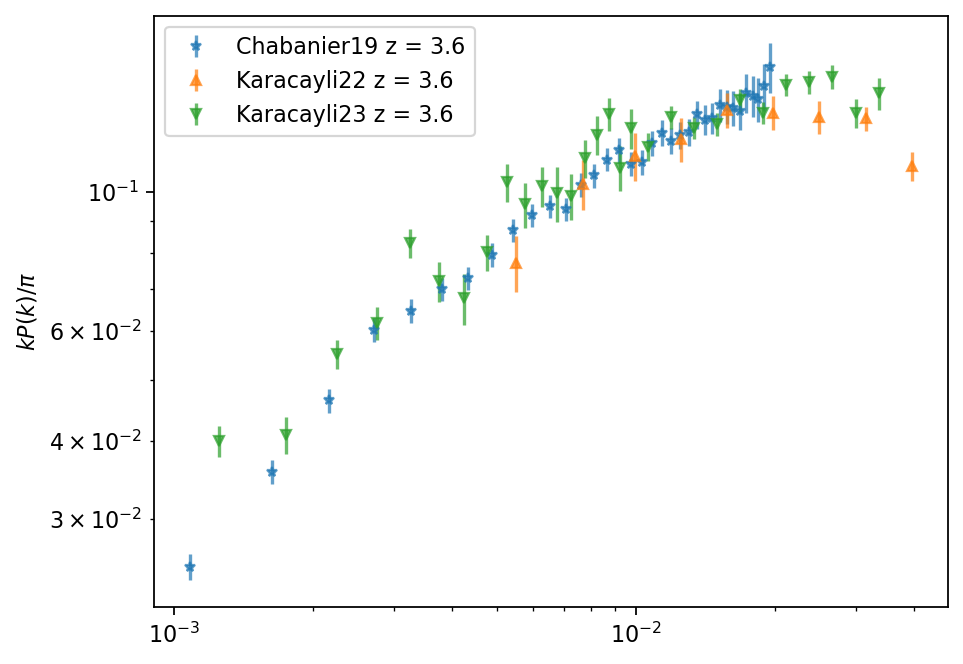

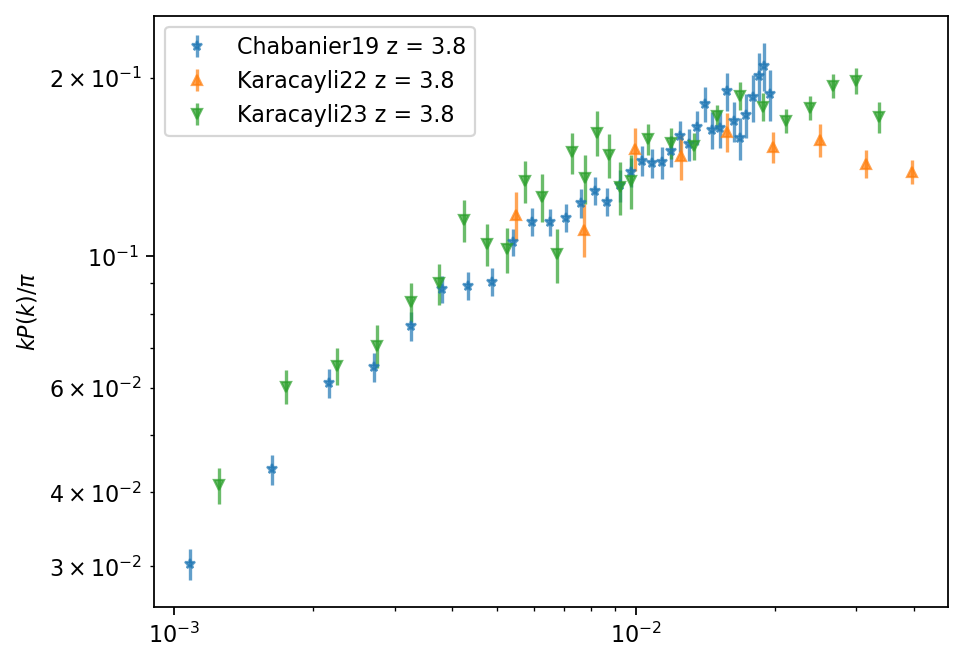

In [16]:
zs = data_Karacayli2022.P1D_Karacayli2022().z.copy()
zs = zs[zs <= 3.8]
for z in zs:
    combined_plot(datasets,zmin=z-0.01,zmax=z+0.01,kmax=0.04)
    plt.show()